# Sentiment Analysis of CRM

## Sentiment analysis using TextBlob

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm, tqdm_notebook

import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 

In [2]:
def clean_tweet(tweet): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 

def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [3]:
text = 'quality of the item is not bad'

get_tweet_sentiment(text)

'positive'

In [4]:
reviews = pd.read_excel('../data/Bag_Reviews.xlsx')
reviews = reviews[['rating','comments']]
reviews = reviews.drop_duplicates()
reviews.head()

,rating,comments
0,4,Give 4 stars because order at the price 37 but...
1,5,Ordered at a discount of 10 baht per piece. It...
2,5,"Small, cute, compact, good But the sash looks ..."
3,1,The size is not as large as it is down. The st...
4,1,The product is compared to the price. Okay. Se...


In [5]:
reviews.shape

(2677, 2)

In [6]:
senti = []
for i in tqdm_notebook(range(len(reviews))):
    senti.append(get_tweet_sentiment(reviews.comments.iloc[i]))
    

In [7]:
senti[0:5]

['negative', 'positive', 'positive', 'negative', 'negative']

In [8]:
reviews['sentiment_pred'] = senti
reviews['sentiment_real'] = 'neutral'
reviews.loc[(reviews['rating']==1) | (reviews['rating']==2),'sentiment_real'] = 'negative'
reviews.loc[(reviews['rating']==4) | (reviews['rating']==5),'sentiment_real'] = 'positive'
reviews['error'] = reviews.sentiment_pred==reviews.sentiment_real
reviews.head()

,rating,comments,sentiment_pred,sentiment_real,error
0,4,Give 4 stars because order at the price 37 but...,negative,positive,False
1,5,Ordered at a discount of 10 baht per piece. It...,positive,positive,True
2,5,"Small, cute, compact, good But the sash looks ...",positive,positive,True
3,1,The size is not as large as it is down. The st...,negative,negative,True
4,1,The product is compared to the price. Okay. Se...,negative,negative,True


In [9]:
reviews.tail()

,rating,comments,sentiment_pred,sentiment_real,error
3177,5,"7 baht is very cheap. Like, light, comfortable...",positive,positive,True
3178,3,"Ordered Pink to be blue, very disappointed The...",negative,neutral,False
3179,4,"Pretty good, but want the product pack to be b...",positive,positive,True
3180,5,Received the product. Shop well packaged goods...,positive,positive,True
3181,5,Products delivered very fast. The real product...,positive,positive,True


In [10]:
reviews.error.value_counts()

True     2012
False     665
Name: error, dtype: int64

In [11]:
reviews.sentiment_pred.value_counts()

positive    2058
negative     329
neutral      290
Name: sentiment_pred, dtype: int64

In [12]:
reviews.sentiment_real.value_counts()

positive    2065
negative     372
neutral      240
Name: sentiment_real, dtype: int64

In [13]:
acc = reviews.error.value_counts()[1]/len(reviews)
print('-I- Accuracy = ',acc)

-I- Accuracy =  0.7515875980575271


In [14]:
i=10
reviews.loc[reviews.sentiment_real=='neutral','comments'].iloc[i]

"Order many things Get some wrong things, wrong colors, some have this one that meets the set Do not know because of the reduction period How many people do you order? But the product is not exactly the same as the one you don't want"

In [15]:
reviews.loc[reviews.sentiment_real=='neutral','sentiment_pred'].iloc[i]

'negative'

In [16]:
reviews.shape

(2677, 5)

## Sentiment analysis using fastai

### language model

In [17]:
df = reviews[['sentiment_real','comments']]
df.columns = ['sentiment','text']

In [18]:
from fastai.text import *

In [19]:
path = './../data'

In [20]:
# split df into training and validation
train_df, valid_df = df.loc[:2000,:], df.loc[2000:,:]

# create databunches
data_lm = TextLMDataBunch.from_df(path, train_df, valid_df)#, text_cols=1)#, bs=10)
data_clas = TextClasDataBunch.from_df(path, train_df, valid_df)#, text_cols=5, label_cols=1, bs=10)


In [21]:
data_lm.show_batch()

idx,text
0,"little fragile xxmaj have to xxunk myself that do not put too many things to be sure xxmaj how to put a sash xxbos xxmaj the size is not as large as it is down . xxmaj the stitching was wrong . xxmaj the bag line is xxunk . xxmaj no , why are you like this ? xxmaj lost 8 orders xxbos xxmaj the product is compared to the"
1,"product to subsidize another good product at a good price . xxbos xxmaj it 's cute . xxmaj but cut off the xxunk , not ok xxmaj almost every thread dropped xxmaj do not wear heavy stuff . xxmaj it 's a shame . xxmaj beautiful but not resistant . xxmaj definitely sewing like this . xxbos xxmaj fair product quality xxmaj good value with the price xxmaj very fast"
2,xxbos xxmaj okokokokokok xxwrep 5 ok o kok ok \n xxmaj okokokokokok xxwrep 5 ok o kok ok \n xxmaj okokokokokok xxwrep 5 ok o kok ok \n xxmaj okokokokokok xxwrep 5 ok o kok ok \n xxmaj okokokokokok xxwrep 5 ok o kok ok \n xxmaj okokokokokok xxwrep 5 ok o kok ok \n xxmaj okokokokokok xxwrep 5 ok o kok ok \n
3,"desirable xxrep 4 . xxmaj very desirable xxrep 4 . xxmaj very desirable xxrep 4 . xxmaj thank you very much ... xxmaj ka ^^ xxmaj thank you very much xxrep 4 . xxbos xxmaj well , let 's talk about each other . xxmaj let 's talk about each other . xxmaj let 's talk about each other . xxmaj let 's go . xxmaj let 's go ."
4,"xxrep 5 . fast delivery ... xxmaj cheap , any other , any other xxrep 7 . good quality xxrep 5 . fast delivery .. xxbos xxmaj very good quality xxmaj very good value xxmaj the color has been correct as ordered . xxmaj there is 1 wrong color . xxmaj but overall , okay . xxmaj good transportation company . xxmaj receiving products quickly . xxmaj xxunk stores ."


In [22]:
data_clas.show_batch()

text,target
"xxbos xxup ddd xxmaj dee xxmaj dee d xxmaj good , d , xxmaj dee d , xxmaj dee xxmaj dee , xxmaj dee xxmaj dee , xxwrep 6 xxmaj good , xxmaj very xxmaj good , xxmaj very xxmaj good , xxmaj good , xxmaj very xxmaj good , xxmaj good , xxmaj very xxwrep 4 xxmaj good , xxmaj very xxmaj good , xxmaj good , xxmaj very",positive
"xxbos xxmaj xxunk , any other , any other , any other , any xxwrep 11 other related other options . xxmaj any other , any other , any other , any other , any other , and any other , any other , any other , any other , or other xxmaj any other , any other , any other , any other , any other , and any",positive
xxbos xxmaj it 's pretty cute . { ~ { ~ { ~ xxrep 11 { [ { { { xxup î² { xxup î² { xxup î² } xxup î² { } { { { } { } } } ~ } { ~ } ^ } ~ } ~ } ~ } ~ } ~ < ~ } ~ } ~ { ~ } ^ { ~ },positive
"xxbos xxmaj like a lot , like a lot , like a lot , like a lot , likes a lot , likes a lot , likes a lot , likes a lot , likes a lot , likes a lot , likes a lot , likes a lot , likes a lot , likes a lot , likes a lot , likes a lot , likes a lot ,",positive
"xxbos xxmaj ca n't get the goods , i ca n't go . i ca n't answer . i ca n't answer . i ca n't answer . i ca n't answer . i ca n't answer . i ca n't answer . i ca n't answer . i ca n't answer . i ca n't answer . i ca n't answer . i ca n't answer . i ca",negative


In [23]:
# am_data = pd.read_csv('/home/gpu1/.fastai/data/amazon_review_full_csv/train.csv',header=None)
# am_data.columns = ['rating','review_title','text']
# am_data = am_data.dropna()
# am_data['sentiment_real'] = 'neutral'
# am_data.loc[(am_data['rating']==1) | (am_data['rating']==2),'sentiment_real'] = 'negative'
# am_data.loc[(am_data['rating']==4) | (am_data['rating']==5),'sentiment_real'] = 'positive'
# am_data.head()

In [24]:
# am_data.rating.value_counts()

In [25]:
# tmp1 = am_data[am_data.rating==1].iloc[0:100000]
# tmp1 = tmp1.append(am_data[am_data.rating==2].iloc[0:100000])
# tmp1 = tmp1.append(am_data[am_data.rating==3].iloc[0:100000])
# tmp1 = tmp1.append(am_data[am_data.rating==4].iloc[0:100000])
# tmp1 = tmp1.append(am_data[am_data.rating==5].iloc[0:100000])
# am_data = tmp1.copy()
# tmp1 = None

In [26]:
# am_data1 = pd.read_csv('/home/gpu1/.fastai/data/amazon_review_full_csv/test.csv',header=None)
# am_data1.columns = ['rating','review_title','text']
# am_data1 = am_data1.dropna()
# am_data1['sentiment_real'] = 'neutral'
# am_data1.loc[(am_data1['rating']==1) | (am_data1['rating']==2),'sentiment_real'] = 'negative'
# am_data1.loc[(am_data1['rating']==4) | (am_data1['rating']==5),'sentiment_real'] = 'positive'
# am_data1.head()

In [27]:
# am_data1.rating.value_counts()

In [28]:
# tmp1 = am_data1[am_data1.rating==1].iloc[0:10000]
# tmp1 = tmp1.append(am_data1[am_data1.rating==2].iloc[0:10000])
# tmp1 = tmp1.append(am_data1[am_data1.rating==3].iloc[0:10000])
# tmp1 = tmp1.append(am_data1[am_data1.rating==4].iloc[0:10000])
# tmp1 = tmp1.append(am_data1[am_data1.rating==5].iloc[0:10000])
# am_data1 = tmp1.copy()
# tmp1 = None

In [ ]:
# am_train = am_data[['sentiment_real','text']]
# am_test = am_data1[['sentiment_real','text']]

# am_data =None
# am_data1 = None

# #path = untar_data(URLs.WT103_BWD)
# data = TextLMDataBunch.from_df(path, am_train,am_test)
# learn = language_model_learner(data, AWD_LSTM, drop_mult=0.5)

# data.show_batch()


In [83]:
learn = language_model_learner(data_lm,arch=AWD_LSTM,  drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


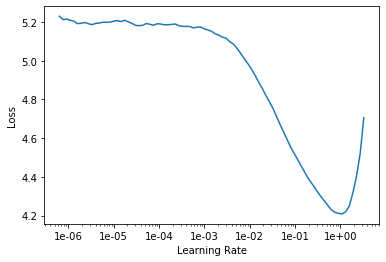

In [84]:
learn.lr_find() # find learning rate
learn.recorder.plot() # plot learning rate graph

In [85]:
learn.fit_one_cycle(1, 1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,3.761256,2.963980,0.400128,00:01


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


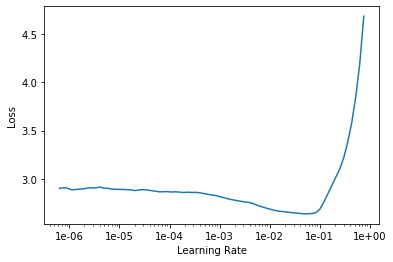

In [86]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

In [87]:
learn.fit(10, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,5.664549,4.213936,0.250351,00:01
1,4.696902,3.608692,0.308259,00:01
2,4.197229,3.345120,0.338297,00:01
3,3.841983,3.051824,0.382207,00:01
4,3.546465,2.894457,0.399426,00:01
5,3.294350,2.811209,0.416964,00:01
6,3.077348,2.746190,0.431409,00:01
7,2.884650,2.719438,0.429400,00:01
8,2.713161,2.725965,0.434120,00:01
9,2.553248,2.705909,0.433355,00:01


In [88]:
# make predictions
TEXT = "I liked "
N_WORDS = 40
N_SENTENCES = 2
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

# save encoder
learn.save_encoder('review-sentiment-enc')

I liked  it very quickly . If you have to order hello to the picture Very good . Very beautiful . Not complete . Every leaves are worth it . Very good value Very fast
I liked  it very much . In shape , suitable for wearing compact shoulder bag , lazy for the price , but the delivery is very poor . xxbos And the price is very cheap . The product is


### classification model

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


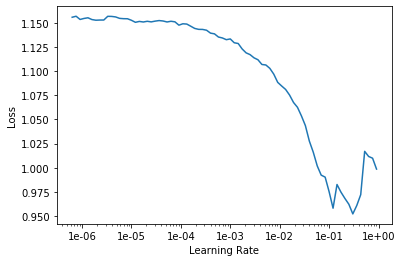

In [89]:
# create model and load in encoder
learn2 = text_classifier_learner(data_clas,arch=AWD_LSTM, drop_mult=0.3)
learn2.load_encoder('review-sentiment-enc')

# find and plot learning rate
learn2.lr_find()
learn2.recorder.plot()

In [90]:
# learn2.fit_one_cycle(1, 1e-2)

# # unfreeze one layer group and train another epoch
# learn2.freeze_to(-2)
# learn2.fit_one_cycle(1, slice(5e-3/2., 5e-3))

# learn2.freeze_to(-3)
# learn2.fit_one_cycle(1, slice(5e-3/2., 5e-3))

# learn2.unfreeze()
# learn2.fit_one_cycle(1, slice(2e-3/100, 2e-3))

learn2.fit(10,1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.743805,0.648677,0.785311,00:01
1,0.652424,0.569580,0.814689,00:01
2,0.604145,0.567375,0.812429,00:01
3,0.579178,0.561933,0.806780,00:01
4,0.559645,0.555209,0.797740,00:01
5,0.544239,0.523074,0.814689,00:01
6,0.523865,0.554706,0.807910,00:01
7,0.516978,0.551310,0.804520,00:01
8,0.509387,0.593197,0.803390,00:01
9,0.498898,0.594534,0.789831,00:01


In [91]:
learn2.predict("size of this item is too small than i excpected,i dont want this ")

(Category negative, tensor(0), tensor([0.7287, 0.1107, 0.1606]))